# COVID-19 Clusters Mapping

The Metro Public Health Department tracks COVID-19 clusters. The files `clusters.csv` and `clusters_by_type.csv` contain the tables of clusters as reported by [WSMV](https://www.wsmv.com/news/metro-health-releases-latest-covid-19-clusters/article_ef554e08-1558-11eb-b290-873345e174d7.html) along with the coordinates of the clusters. Can you find any connection between the reported COVID violations and subsequent COVID clusters?

In [1]:
# import statements
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
# import contextily as ctx
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from cartopy.io import shapereader
%matplotlib inline

In [2]:
# display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Read in a base map of Davidson County, parsed by zipcode

In [3]:
davidson = gpd.read_file('../data/zipcodes.geojson')
print(davidson.crs)
davidson.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


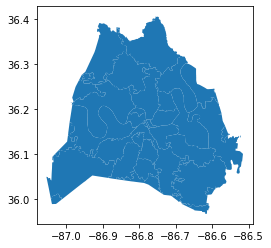

In [4]:
davidson.plot();

### Create some geo dataframes to map things

In [5]:
# Create a geopandas dataframe based on the violations data, grouped by location
violations_by_loc_geo = gpd.GeoDataFrame(
    violations_by_loc, crs = davidson.crs, geometry = gpd.points_from_xy(violations_by_loc.long, violations_by_loc.lat))

# Make sure it worked
violations_by_loc_geo.head()

NameError: name 'violations_by_loc' is not defined

In [ ]:
# # Create a geopandas dataframe based on the violations data, grouped by location
# violations_geo = gpd.GeoDataFrame(
#     violations, geometry = gpd.points_from_xy(violations.long, violations.lat))

# # Make sure it worked
# violations_geo.head()

In [ ]:
# If using the full violations dataset
# violations_geo = violations_geo.drop(['datetime_opened', 'address', 'city', 'zip', 'lat', 'long', 'coord'], axis = 1)

In [ ]:
# # Set the CRS
# violations_geo = violations_geo.set_crs(epsg=4326)
# print(violations_geo.crs)

In [ ]:
# violations_geo.info()

In [ ]:
# Create a geopandas dataframe based on the cleaned-up clusters dataframe
clusters_geo = gpd.GeoDataFrame(
    clusters, crs = davidson.crs, geometry = gpd.points_from_xy(clusters.long, clusters.lat))

# Make sure it worked
clusters_geo.head()

In [ ]:
clusters_geo = clusters_geo.drop(['lat', 'long'], axis = 1)

In [ ]:
clusters_geo.info()

In [ ]:
# Join the clusters and violations data to the base map of Davidson County
violations_by_zip = gpd.sjoin(violations_by_loc_geo, davidson, op = 'within')

In [ ]:
violations_by_zip.head()

In [ ]:
# Quick cleanup
violations_by_zip = violations_by_zip.rename(columns = {'request_no' : 'total_violations'})
violations_by_zip = violations_by_zip.drop('index_right', axis = 1)
violations_by_zip.head()

In [ ]:
ax = davidson.plot(figsize = (10, 10), color = 'cadetblue')
violations_by_zip.plot(ax = ax, markersize = violations_by_zip['total_violations'], color = 'ivory');

In [ ]:
# Another attempt to get a decent basemap
ax = violations_by_zip.plot(figsize = (10, 10), alpha = 0.5, markersize = violations_by_zip['total_violations'])
ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner, zoom = 12)

In [ ]:
# Let's try folium
covid_map = folium.Map(
    location=[36.1627, -86.7816],
    tiles='Stamen Toner',
    zoom_start=11
)

In [ ]:
# # DON'T RUN ME, I WILL CRASH THE NOTEBOOK
# for row_index, row_values in violations_by_zip.iterrows():
#     loc = [row_values['lat'], row_values['long']]
#     pop = str(row_values['total_violations'])
#     marker = folium.Marker(
#         location = loc, 
#         popup = pop) 
    
#     marker.add_to(covid_map)
# covid_map.save('..covid_map.html')

# #display the map
# covid_map

In [ ]:
clusters_by_zip = gpd.sjoin(clusters_geo, davidson, op = 'within')
clusters_by_zip.head()

In [ ]:
ax = davidson.plot(figsize = (10, 10), color = 'cadetblue')
clusters_by_zip.plot(ax = ax, markersize = clusters_by_zip['case_count'], color = 'ivory');

### Join the two maps together

In [ ]:
clusters_and_violations_geo = clusters_by_zip.append(violations_by_zip)
clusters_and_violations_geo.info()

In [ ]:
clusters_and_violations_geo.head()

In [ ]:
ax = davidson.plot(figsize = (10, 10), color = 'cadetblue')
clusters_and_violations_geo.plot(ax = ax, markersize = ['case_count', 'total_violations'], color = ['ivory', 'red']);